In [13]:
from scipy.integrate import quad
import math
import matplotlib.pyplot as plt

# constant
a_0 = 7e8 #cm
v_0 = 1.3e9 #cm/s
D = 3.086e22 #cm
M_solar = 1.989e33 #g
M_ej = 1.4 * M_solar #g
M_p = 1.67e-24 #g
M_e = 9.11e-28 #g
M_Co = 56 * M_p #g
e = 1e-9 #calibration
M_56_Ni_core = 0.5 * M_solar #g

# model selection
model = 'shell'
# model = 'core'

In [14]:
# calculation of Flux in diffterent time: (input unit: days)
def F_Co(t):
    a = a_0 + v_0*t*86400 #cm
    R_0 = (0.9 * M_56_Ni_core/M_ej)**(1/3) * a #cm
    h = (0.1 * M_56_Ni_core * 21 / math.pi)**(1/3) #cm
    S_E = 0.68 / 56 * (math.e**(-t/111.3) - math.e**(-t/8.8)) / ((111.3 - 8.8)*86400) / (0.06604 * M_Co)

    # integration for Flux
    def f2(x):
        # the outer shell
        tai_a = M_ej / M_p / (4/3 * math.pi * (a)** 3) * 0.06604 * M_Co * a
        l2 = 2 * math.sqrt((a)**2 - (D * x)**2)

        f2 = (1 - math.e**(- tai_a * l2 / a)) * x
        return f2
    
    res2, err = quad(f2, (a-h)/D, a/D)

    def f1(x):
        # middle part
        tai_a = M_ej / M_p / (4/3 * math.pi * (a)** 3) * 0.06604 * M_Co * a
        l1 = math.sqrt((a)**2 - (D * x)**2) - math.sqrt((a-h)**2 - (D * x)**2)
        s1 = 2 * math.sqrt((a-h)**2 - (D * x)**2)

        f1 = (1 - math.e**(- tai_a * l1 / a)) * (math.e**(-tai_a * (s1 + l1)/a) + 1) * x
        return f1

    res1, err = quad(f1, R_0/D, (a-h)/D)

    def f0(x):
        # inner shell
        tai_a = M_ej / M_p / (4/3 * math.pi * (a)** 3) * 0.06604 * M_Co * a
        l0 = 2 * math.sqrt((R_0)**2 - (D * x)**2)
        l1 = math.sqrt((a)**2 - (D * x)**2) - math.sqrt((a-h)**2 - (D * x)**2)
        s0 = 2 * math.sqrt((a-h)**2 - (D * x)**2) - math.sqrt((R_0)**2 - (D * x)**2)

        f0 = x * ((1 - math.e**(- tai_a * l1 / a)) * (math.e**(-tai_a * (2*s0 + l0 + l1)/a)) 
                  + (1 - math.e**(- tai_a * l0 / a)) * (math.e**(-tai_a * (s0 + l1)/a))
                  + (1 - math.e**(- tai_a * l1 / a)))
        return f0

    res0, err = quad(f0, 0, R_0/D)
    
    # result selection
    if model == 'shell': 
        return S_E * (res2 + res1 + res0)
    if model == 'core':
        return S_E * (res0 + res1)

In [15]:
# data
t = []
for i in range(1, 2501):
    t.append(i)

flux_Co = []
for i in t:
    flux_Co.append(F_Co(i))

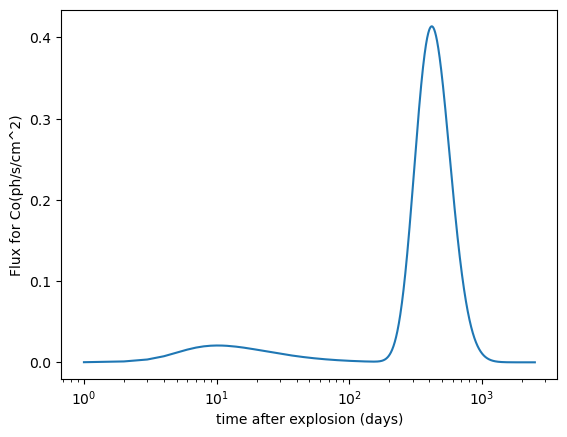

In [16]:
plt.plot(t, flux_Co)
plt.xlabel('time after explosion (days)')
plt.ylabel('Flux for Co(ph/s/cm^2)')

plt.xscale('log')
# plt.yscale('log')
plt.show()